<a href="https://colab.research.google.com/github/byambaa1982/timeseries/blob/master/codealong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import TimeSeriesSplit

# Models I've used here 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import AdaBoostRegressor


%matplotlib inline

In [2]:
df = pd.read_csv('/tmdata.csv')
df.head()

,Temperature,humidity,time
0,23.310000,32.910000,2019-08-20T18:00:00Z
1,23.356667,32.886667,2019-08-20T18:05:00Z
2,23.380000,32.812500,2019-08-20T18:10:00Z
3,23.345000,32.855000,2019-08-20T18:15:00Z
4,23.224000,33.068000,2019-08-20T18:20:00Z


In [3]:
df.dtypes

Temperature    float64
humidity       float64
time            object
dtype: object

In [4]:
df.tail()

,Temperature,humidity,time
8636,25.810,18.346000,2019-09-19T17:40:00Z
8637,25.765,18.370000,2019-09-19T17:45:00Z
8638,25.750,18.350000,2019-09-19T17:50:00Z
8639,25.750,18.427500,2019-09-19T17:55:00Z
8640,25.730,18.466667,2019-09-19T18:00:00Z


In [0]:
df = pd.read_csv('/tmdata.csv')
df['time'] = pd.to_datetime(df['time'])

In [5]:
df.head()

,Temperature,humidity,time
0,23.310000,32.910000,2019-08-20 18:00:00+00:00
1,23.356667,32.886667,2019-08-20 18:05:00+00:00
2,23.380000,32.812500,2019-08-20 18:10:00+00:00
3,23.345000,32.855000,2019-08-20 18:15:00+00:00
4,23.224000,33.068000,2019-08-20 18:20:00+00:00


In [32]:
df.dtypes

Temperature                float64
humidity                   float64
time           datetime64[ns, UTC]
dtype: object

In [6]:
df.set_index('time', inplace=True)
df.head()

,Temperature,humidity
time,,
2019-08-20 18:00:00+00:00,23.310000,32.910000
2019-08-20 18:05:00+00:00,23.356667,32.886667
2019-08-20 18:10:00+00:00,23.380000,32.812500
2019-08-20 18:15:00+00:00,23.345000,32.855000
2019-08-20 18:20:00+00:00,23.224000,33.068000


In [37]:
df.tail()

,Temperature,humidity
time,,
2019-09-19 17:40:00+00:00,25.810,18.346000
2019-09-19 17:45:00+00:00,25.765,18.370000
2019-09-19 17:50:00+00:00,25.750,18.350000
2019-09-19 17:55:00+00:00,25.750,18.427500
2019-09-19 18:00:00+00:00,25.730,18.466667


In [39]:
df['2019-08-21'].head()

,Temperature,humidity
time,,
2019-08-21 00:00:00+00:00,22.765,33.532500
2019-08-21 00:05:00+00:00,22.810,33.487500
2019-08-21 00:10:00+00:00,22.780,33.525000
2019-08-21 00:15:00+00:00,22.750,33.546667
2019-08-21 00:20:00+00:00,22.738,33.538000


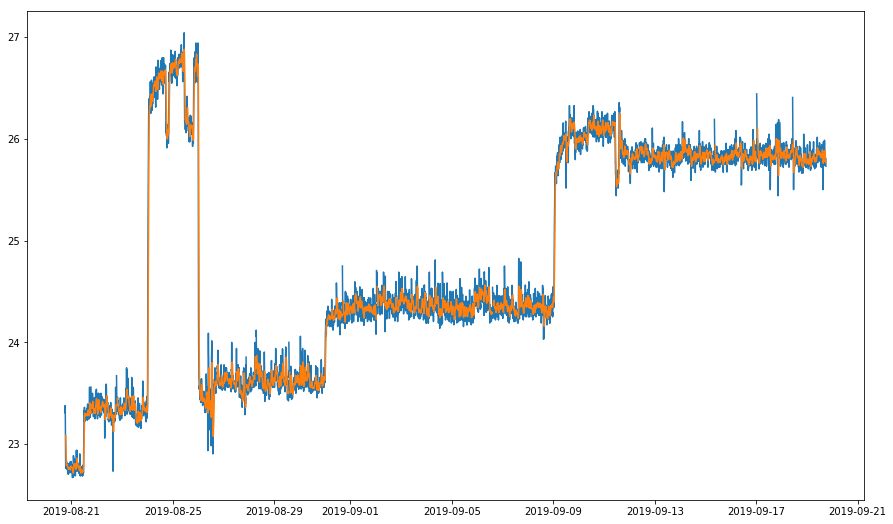

In [41]:
plt.figure(figsize=(15,9))
plt.plot(df['Temperature'])
plt.plot(df['Temperature'].rolling(10).mean())

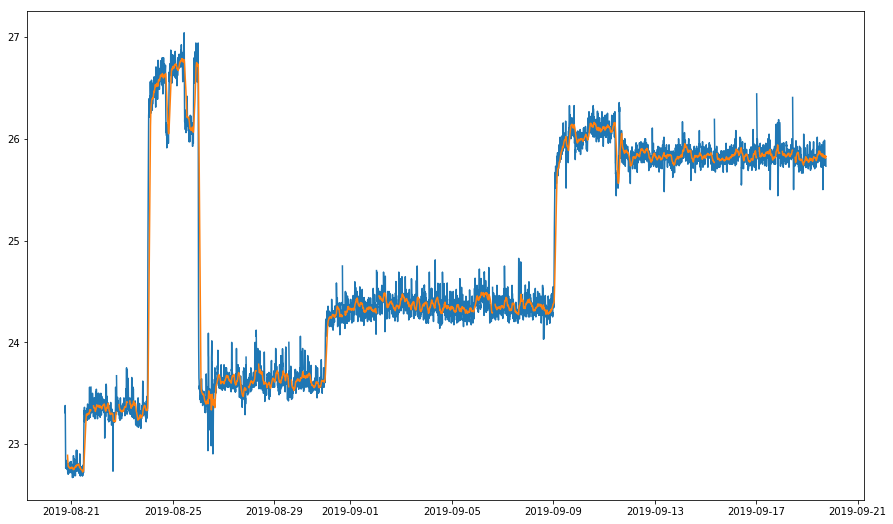

In [42]:
plt.figure(figsize=(15,9))
plt.plot(df['Temperature'])
plt.plot(df['Temperature'].rolling(30).mean())

## Shifting 5 min

In [10]:
df.shift().head()

,Temperature,humidity
time,,
2019-08-20 18:00:00+00:00,NaN,NaN
2019-08-20 18:05:00+00:00,23.310000,32.910000
2019-08-20 18:10:00+00:00,23.356667,32.886667
2019-08-20 18:15:00+00:00,23.380000,32.812500
2019-08-20 18:20:00+00:00,23.345000,32.855000


In [0]:
temp_1 = df[['Temperature']].shift().rename(columns={'Temperature': 'Temp - 1'})
train = pd.concat([temp_1, df[['Temperature', 'humidity']]], axis=1)

In [13]:
train.dropna(inplace=True)
train.head()

,Temp - 1,Temperature,humidity
time,,,
2019-08-20 18:05:00+00:00,23.310000,23.356667,32.886667
2019-08-20 18:10:00+00:00,23.356667,23.380000,32.812500
2019-08-20 18:15:00+00:00,23.380000,23.345000,32.855000
2019-08-20 18:20:00+00:00,23.345000,23.224000,33.068000
2019-08-20 18:25:00+00:00,23.224000,23.030000,33.472500


### Use cross_val_score to see how a RandomForestRegressor

In [0]:
X = train[['Temp - 1', 'humidity']]
y = train['Temperature']

In [0]:
rf = RandomForestRegressor()

In [49]:
cross_val_score(rf, X, y, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

array([0.96854362, 0.91294164, 0.32479222, 0.9813224 , 0.46958955])

In [50]:
train['Pred']=cross_val_predict(rf,X,y)
train.head()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Temp - 1,Temperature,humidity,Pred
time,,,,
2019-08-20 18:05:00+00:00,23.310000,23.356667,32.886667,23.588500
2019-08-20 18:10:00+00:00,23.356667,23.380000,32.812500,23.593333
2019-08-20 18:15:00+00:00,23.380000,23.345000,32.855000,23.600000
2019-08-20 18:20:00+00:00,23.345000,23.224000,33.068000,23.570500
2019-08-20 18:25:00+00:00,23.224000,23.030000,33.472500,23.542000


In [51]:
train.tail()

,Temp - 1,Temperature,humidity,Pred
time,,,,
2019-09-19 17:40:00+00:00,25.790,25.810,18.346000,25.86075
2019-09-19 17:45:00+00:00,25.810,25.765,18.370000,25.95075
2019-09-19 17:50:00+00:00,25.765,25.750,18.350000,25.86125
2019-09-19 17:55:00+00:00,25.750,25.750,18.427500,25.81425
2019-09-19 18:00:00+00:00,25.750,25.730,18.466667,25.81425


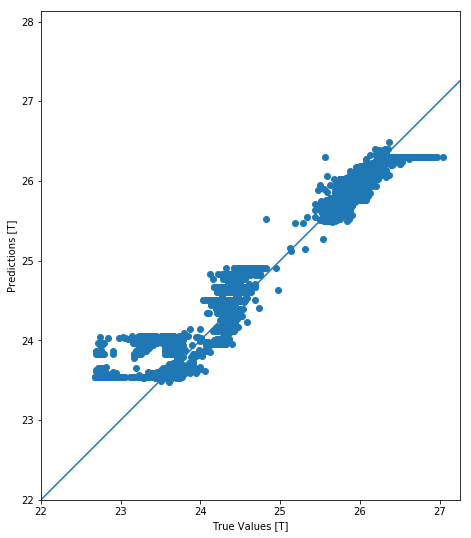

In [61]:
plt.figure(figsize=(15,9))
plt.scatter(train.Temperature, train.Pred)
plt.xlabel('True Values [T]')
plt.ylabel('Predictions [T]')
# plt.axis('equal')
plt.axis('square')
plt.xlim([22,plt.xlim()[1]])
plt.ylim([22,plt.ylim()[1]])
_ = plt.plot([0, 310], [0, 310])

In [64]:
r2=r2_score(train.Temperature, train.Pred)
r2

0.9147731689055788

In [69]:
# Performance metrics
errors = abs(train.Pred - train.Temperature)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / train.Temperature)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 0.24 degrees.
Accuracy: 99.02 %.


## Backtest Machine Learning Models for Time Series Forecasting

### Train test split

In [95]:
train_size = int(len(X) * 0.66)
train, test = train[0:train_size], train[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 8614
Training Observations: 5685
Testing Observations: 2929


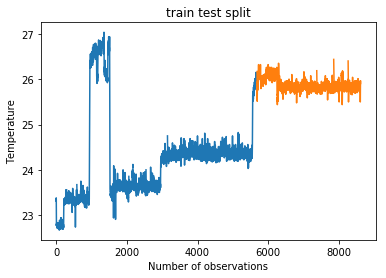

In [96]:
pyplot.plot([i for i in train.Temperature])
pyplot.plot([None for i in train.Temperature] + [x for x in test.Temperature])
plt.title('train test split')
plt.xlabel('Number of observations')
plt.ylabel('Temperature')
pyplot.show()

In [0]:
df = pd.read_csv('/tmdata.csv')
df['time'] = pd.to_datetime(df['time'])

#shift target variable 5 minutes back 
#in order to train model to predict 5 minutes into future
n=5 # 5 minutes
df['Temp-1'] = df['Temperature'].shift(-int(n/5))
df = df.dropna()

#make numpy arrays
x = np.array(df[['Temperature', 'humidity']])
y = np.array(df['Temp-1']).reshape(-1,1)

In [0]:
#custom backtest function
def backtest(n_days, model):
    """
    n_days - amount of the last n_days that we want to get prediction and calculate metrics
    """
    predictions = []
    true_values = []
    for i in reversed(range(1, n_days)):
        x_train = x[:len(x)-i]
        y_train = y[:len(y)-i].ravel()
        x_test = x[len(x)-i]
        y_test = y[len(y)-i].ravel()
        model = model
        model.fit(x_train, y_train)
        predictions.append(model.predict([x_test])[0])
        true_values.append(y_test[0])
    return true_values, predictions

In [0]:
br=BayesianRidge()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()

##Bayesian Ridge linear regressor

In [0]:
true_values=backtest(20,br)[0]
predictions=backtest(20,br)[1]

No handles with labels found to put in legend.


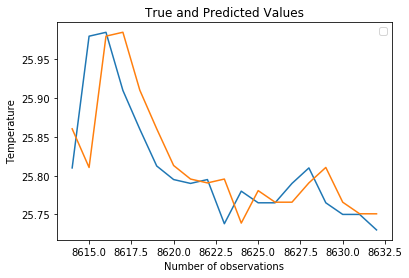

In [90]:
# pyplot.plot([i for i in y[8600:8615]])
pyplot.plot([None for i in y] + [x for x in true_values])
pyplot.plot([None for i in y] + [x for x in predictions])
plt.title('True and Predicted Values')
plt.xlabel('Number of observations')
plt.ylabel('Temperature')
plt.legend()
pyplot.show()

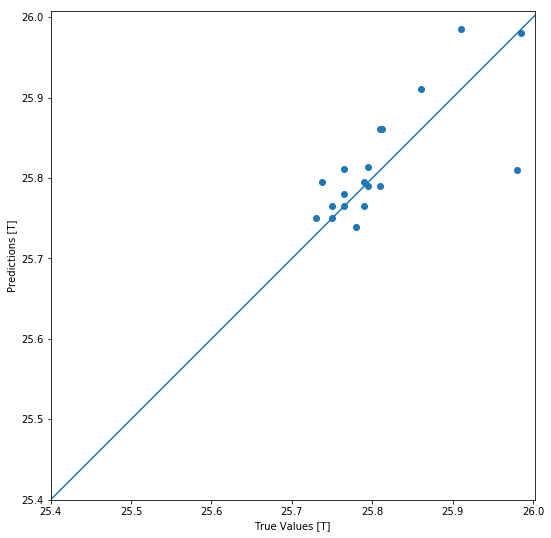

In [101]:
true_values=backtest(20,br)[0]
predictions=backtest(20,br)[1]
plt.figure(figsize=(15,9))
plt.scatter(true_values, predictions)
plt.xlabel('True Values [T]')
plt.ylabel('Predictions [T]')
# plt.axis('equal')
plt.axis('square')
plt.xlim([25.4,plt.xlim()[1]])
plt.ylim([25.4,plt.ylim()[1]])
_ = plt.plot([0, 310], [0, 310])

## RandomForest Regressor

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
No handles with labels found to put in legend.


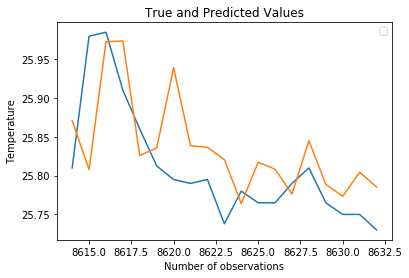

In [91]:
true_values=backtest(20,rf)[0]
predictions=backtest(20,rf)[1]
# pyplot.plot([i for i in y[8600:8615]])
pyplot.plot([None for i in y] + [x for x in true_values])
pyplot.plot([None for i in y] + [x for x in predictions])
plt.title('True and Predicted Values')
plt.xlabel('Number of observations')
plt.ylabel('Temperature')
plt.legend()
pyplot.show()

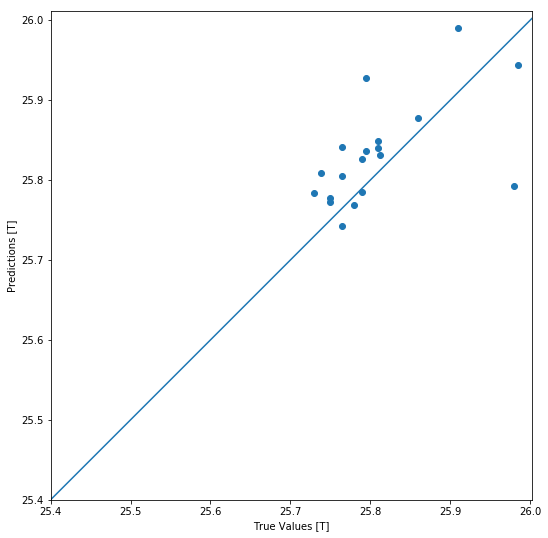

In [102]:
true_values=backtest(20,rf)[0]
predictions=backtest(20,rf)[1]
plt.figure(figsize=(15,9))
plt.scatter(true_values, predictions)
plt.xlabel('True Values [T]')
plt.ylabel('Predictions [T]')
# plt.axis('equal')
plt.axis('square')
plt.xlim([25.4,plt.xlim()[1]])
plt.ylim([25.4,plt.ylim()[1]])
_ = plt.plot([0, 310], [0, 310])

## AdaBoost Regressor

No handles with labels found to put in legend.


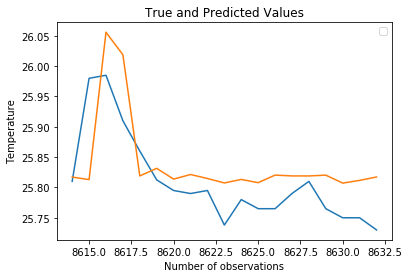

In [92]:
true_values=backtest(20,ada)[0]
predictions=backtest(20,ada)[1]
# pyplot.plot([i for i in y[8600:8615]])
pyplot.plot([None for i in y] + [x for x in true_values])
pyplot.plot([None for i in y] + [x for x in predictions])
plt.title('True and Predicted Values')
plt.xlabel('Number of observations')
plt.ylabel('Temperature')
plt.legend()
pyplot.show()

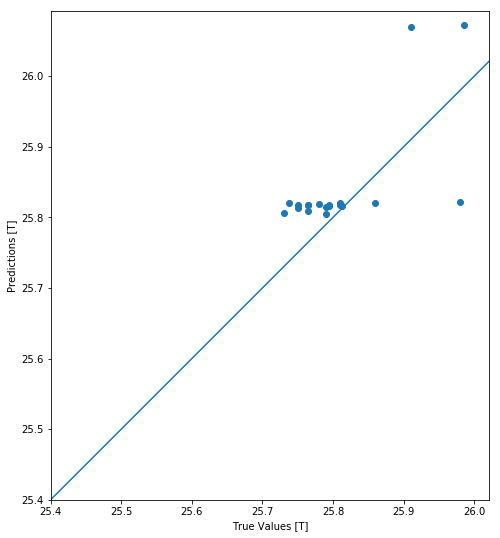

In [103]:
true_values=backtest(20,ada)[0]
predictions=backtest(20,ada)[1]
plt.figure(figsize=(15,9))
plt.scatter(true_values, predictions)
plt.xlabel('True Values [T]')
plt.ylabel('Predictions [T]')
# plt.axis('equal')
plt.axis('square')
plt.xlim([25.4,plt.xlim()[1]])
plt.ylim([25.4,plt.ylim()[1]])
_ = plt.plot([0, 310], [0, 310])

In [64]:
# Performance metrics
errors = abs(df_chart.pred - df_chart.true)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / df_chart.true)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 0.06 degrees.
Accuracy: 99.75 %.


In [0]:
def accuracy_cal(n, model):
  true_values=backtest(20, model)[0]
  predictions=backtest(20, model)[1]
  both={'true':true_values,'pred':predictions}
  df_chart=pd.DataFrame.from_dict(both)
  errors = abs(df_chart.pred - df_chart.true)
  mape = 100 * (errors / df_chart.true)
  accuracy = 100 - np.mean(mape)
  
  print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
  print('Accuracy:', round(accuracy, 2), '%.')

In [73]:
accuracy_cal(20, ada)

Average absolute error: 0.09 degrees.
Accuracy: 99.66 %.


In [74]:
accuracy_cal(20, br)

Average absolute error: 0.06 degrees.
Accuracy: 99.75 %.


In [75]:
accuracy_cal(20, rf)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Average absolute error: 0.08 degrees.
Accuracy: 99.7 %.
